In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import time

data = []
start = 1   # starting rank
limit = 100 # coins per page
total_records = 1000  # how many you want

headers = {
    "User-Agent": "Mozilla/5.0"
}

while start <= total_records:
    print(f"Fetching coins {start} to {start+limit-1}...")

    # Hidden API URL
    url = f"https://api.coinmarketcap.com/data-api/v3/cryptocurrency/listing?start={start}&limit={limit}&sortBy=market_cap&sortType=desc&cryptoType=all&tagType=all&audited=false"

    r = requests.get(url, headers=headers)
    if r.status_code != 200:
        print("Request failed:", r.status_code)
        break

    # Parse JSON text with BeautifulSoup (to stick with your requirement)
    soup = BeautifulSoup(r.text, "html.parser")
    coins_json = r.json()

    coins = coins_json.get("data", {}).get("cryptoCurrencyList", [])
    if not coins:
        break

    for c in coins:
        item = {
            "Name": c.get("name"),
            "Symbol": c.get("symbol"),
            "Price": c.get("quotes", [{}])[0].get("price"),
            "Market Cap": c.get("quotes", [{}])[0].get("marketCap"),
            "24h Change (%)": c.get("quotes", [{}])[0].get("percentChange24h"),
            "7d Change (%)": c.get("quotes", [{}])[0].get("percentChange7d"),
            "Volume 24h": c.get("quotes", [{}])[0].get("volume24h"),
            "Circulating Supply": c.get("circulatingSupply")
        }
        data.append(item)

    start += limit
    time.sleep(1)  # polite delay

# Save to CSV
df = pd.DataFrame(data)
df.to_csv("coinmarketcap_pagination.csv", index=False, encoding="utf-8-sig")

print("Total Records Scraped:", len(df))


Fetching coins 1 to 100...
Fetching coins 101 to 200...
Fetching coins 201 to 300...
Fetching coins 301 to 400...
Fetching coins 401 to 500...
Fetching coins 501 to 600...
Fetching coins 601 to 700...
Fetching coins 701 to 800...
Fetching coins 801 to 900...
Fetching coins 901 to 1000...
Total Records Scraped: 1000


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
path = pd.read_csv("/Users/niteeshyadav/Downloads/coinmarketcap_pagination.csv")

In [7]:
df = pd.DataFrame(path)

In [8]:
df

,Name,Symbol,Price,Market Cap,24h Change (%),7d Change (%),Volume 24h,Circulating Supply
0,Bitcoin,BTC,91190.572312,1.819964e+12,-2.511286,-0.382575,5.818439e+10,1.995781e+07
1,Ethereum,ETH,3127.923067,3.775260e+11,-2.331599,2.434976,2.475114e+10,1.206954e+08
2,Tether USDt,USDT,1.000217,1.855564e+11,-0.001484,0.031097,8.971880e+10,1.855162e+11
3,XRP,XRP,2.059441,1.242494e+11,-5.218946,-7.732983,3.270513e+09,6.033164e+10
4,BNB,BNB,891.528423,1.227956e+11,-2.245727,-0.350770,1.794893e+09,1.377360e+08
...,...,...,...,...,...,...,...,...
995,Ark of Panda,AOP,0.036700,1.101005e+07,-0.555738,-0.289444,2.889233e+06,3.000000e+08
996,ParaSwap,PSP,0.014740,1.098116e+07,-2.214208,-6.832514,1.297636e+03,7.449769e+08
997,noice,NOICE,0.000193,1.096398e+07,-2.754902,-9.863019,1.510692e+06,5.674496e+10
998,Peercoin,PPC,0.366236,1.096195e+07,-2.498145,4.591900,4.324878e+04,2.993135e+07


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                1000 non-null   object 
 1   Symbol              1000 non-null   object 
 2   Price               1000 non-null   float64
 3   Market Cap          1000 non-null   float64
 4   24h Change (%)      1000 non-null   float64
 5   7d Change (%)       1000 non-null   float64
 6   Volume 24h          1000 non-null   float64
 7   Circulating Supply  1000 non-null   float64
dtypes: float64(6), object(2)
memory usage: 62.6+ KB


In [10]:
df.shape

(1000, 8)

In [11]:
df.head(10)

,Name,Symbol,Price,Market Cap,24h Change (%),7d Change (%),Volume 24h,Circulating Supply
0,Bitcoin,BTC,91190.572312,1.819964e+12,-2.511286,-0.382575,5.818439e+10,1.995781e+07
1,Ethereum,ETH,3127.923067,3.775260e+11,-2.331599,2.434976,2.475114e+10,1.206954e+08
2,Tether USDt,USDT,1.000217,1.855564e+11,-0.001484,0.031097,8.971880e+10,1.855162e+11
3,XRP,XRP,2.059441,1.242494e+11,-5.218946,-7.732983,3.270513e+09,6.033164e+10
4,BNB,BNB,891.528423,1.227956e+11,-2.245727,-0.350770,1.794893e+09,1.377360e+08
5,USDC,USDC,0.999852,7.806688e+10,-0.014057,-0.034612,1.108161e+10,7.807840e+10
6,Solana,SOL,136.471785,7.641005e+10,-5.234077,-3.697744,4.165671e+09,5.598963e+08
7,TRON,TRX,0.284912,2.697537e+10,1.557821,1.543164,6.594030e+08,9.467952e+10
8,Dogecoin,DOGE,0.144379,2.332779e+10,-3.866567,-5.112578,1.163989e+09,1.615732e+11
9,Cardano,ADA,0.430914,1.546926e+10,-4.141886,-0.411689,5.588062e+08,3.589869e+10


In [12]:
df.tail()

,Name,Symbol,Price,Market Cap,24h Change (%),7d Change (%),Volume 24h,Circulating Supply
995,Ark of Panda,AOP,0.036700,1.101005e+07,-0.555738,-0.289444,2.889233e+06,3.000000e+08
996,ParaSwap,PSP,0.014740,1.098116e+07,-2.214208,-6.832514,1.297636e+03,7.449769e+08
997,noice,NOICE,0.000193,1.096398e+07,-2.754902,-9.863019,1.510692e+06,5.674496e+10
998,Peercoin,PPC,0.366236,1.096195e+07,-2.498145,4.591900,4.324878e+04,2.993135e+07
999,SWEAT,SWEAT,0.001525,1.093482e+07,-2.027152,-4.404676,2.378404e+06,7.171626e+09


In [13]:
df.describe(include = "all")

,Name,Symbol,Price,Market Cap,24h Change (%),7d Change (%),Volume 24h,Circulating Supply
count,1000,1000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1.000000e+03,1.000000e+03
unique,1000,992,NaN,NaN,NaN,NaN,NaN,NaN
top,Bitcoin,AVA,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.287226e+02,3.128149e+09,-2.607029,-3.775096,2.402182e+08,1.828427e+14
std,NaN,NaN,2.901865e+03,5.939698e+10,6.095389,15.916145,3.529345e+09,5.475497e+15
min,NaN,NaN,6.933739e-10,1.093482e+07,-59.481248,-72.968908,0.000000e+00,1.201849e+04
25%,NaN,NaN,1.753838e-02,1.933368e+07,-4.905432,-9.922442,9.974633e+05,1.331000e+08
50%,NaN,NaN,9.694268e-02,4.069404e+07,-2.812188,-5.320762,5.224985e+06,6.589900e+08
75%,NaN,NaN,5.826245e-01,1.136950e+08,-0.426267,0.032800,1.640730e+07,2.320012e+09


### In Pandas **`df.isnull().sum()`** is used to detect and count missing (null/NaN) values in each column of a Pandas DataFrame.

In [14]:
df.isnull().sum()

Name                  0
Symbol                0
Price                 0
Market Cap            0
24h Change (%)        0
7d Change (%)         0
Volume 24h            0
Circulating Supply    0
dtype: int64

In [15]:
df["Name"].value_counts()

Name
Bitcoin                              1
Simon's Cat                          1
SPDR S&P 500 Tokenized ETF (Ondo)    1
Realio Network                       1
Circle tokenized stock (xStock)      1
                                    ..
UMA                                  1
Moo Deng (moodengsol.com)            1
BounceBit                            1
ICON                                 1
SWEAT                                1
Name: count, Length: 1000, dtype: int64

# Descriptive statistics

## Central Tendancy

In [16]:
round(df["Price"].mean(),4)

np.float64(128.7226)

In [17]:
round(df["Price"].median(),4)

0.0969

In [18]:
df["Volume 24h"].mean()

np.float64(240218239.50682938)

In [19]:
df["Volume 24h"].median()

5224984.937066929

In [20]:
round(df["Market Cap"].mean(),4)

np.float64(3128148832.0042)

In [21]:
round(df["Market Cap"].median(),4)

40694043.0907

# Standard Deviation of Price

In [22]:
round(df["Price"].std(),4)

2901.8645

# Variance of Price

In [23]:
round(df["Price"].var(),4)

8420817.6903

# Range (Max – Min)
- Simplest measure of spread.

- Sensitive to outliers.

In [24]:
round(df["Price"].max(),2)

91190.57

In [25]:
df["Price"].min()

6.93373857210707e-10

In [26]:
df["Price"].max() - df["Price"].min()

91190.57231189233

# Quartiles (Q1, Q2, Q3)

- Split data into 4 equal parts.

- Q1 = 25th percentile, Q2 = Median, Q3 = 75th percentile.

In [27]:
df["Price"].quantile([0.25, 0.5, 0.75])

0.25    0.017538
0.50    0.096943
0.75    0.582624
Name: Price, dtype: float64

# Interquartile Range (IQR)

 Interquartile Range (IQR)

- Spread of the middle 50% of data.

- Less sensitive to outliers.


In [28]:
Q1 = df["Price"].quantile(0.25)
Q3 = df["Price"].quantile(0.75)
IQR = Q3 - Q1
IQR

np.float64(0.5650861217453383)

1. Skewness

- Measures asymmetry of the distribution.

- Skewness > 0 → right-skewed (long right tail, e.g., most cryptos have low prices but a few have very high).

- Skewness < 0 → left-skewed (long left tail).

- Skewness ≈ 0 → symmetric like normal distribution.

In [29]:
df["Price"].skew()

np.float64(31.0116992129329)

In [30]:
df["Market Cap"].skew()

np.float64(29.00587631166894)

2. Kurtosis

- Measures peakedness / tail heaviness.

- Kurtosis > 3 → leptokurtic (heavy tails, more outliers than normal).

- Kurtosis < 3 → platykurtic (light tails, flatter than normal).

- Kurtosis ≈ 3 → mesokurtic (normal-like).

In [31]:
df["Price"].kurt()

np.float64(973.5348493361541)

In [32]:
df["Market Cap"].kurt()

np.float64(880.2615220306301)

3. Histograms

- Visual representation of distribution.

- Useful to see skewness and spread.

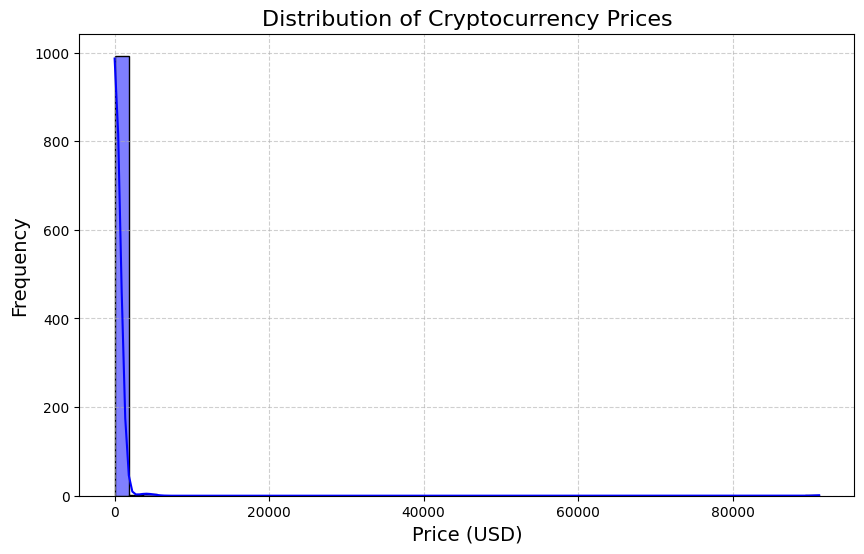

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram + KDE distribution plot for Price
plt.figure(figsize=(10,6))
sns.histplot(df["Price"], bins=50, kde=True, color="blue", edgecolor="black")

plt.title("Distribution of Cryptocurrency Prices", fontsize=16)
plt.xlabel("Price (USD)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


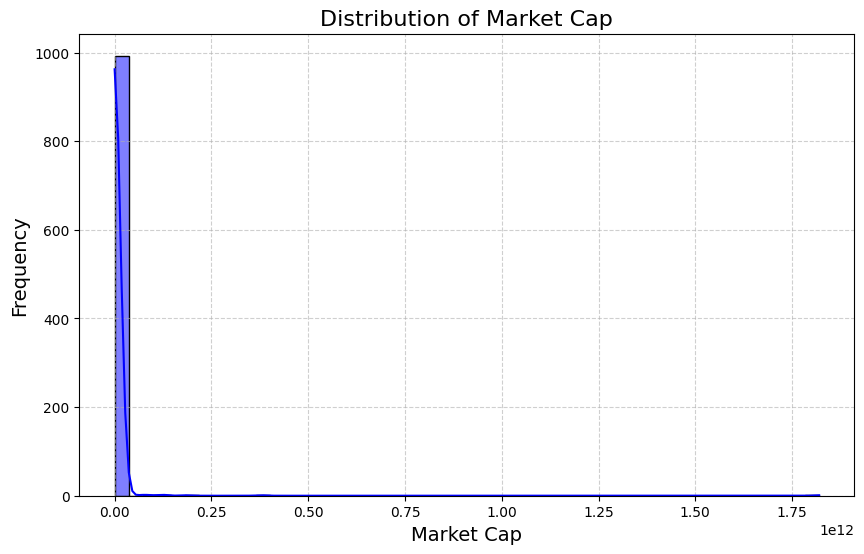

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram + KDE distribution plot for Price
plt.figure(figsize=(10,6))
sns.histplot(df["Market Cap"], bins=50, kde=True, color="blue", edgecolor="black")

plt.title("Distribution of Market Cap", fontsize=16)
plt.xlabel("Market Cap", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


1. Top 10 Cryptocurrencies by Market Cap

In [35]:
top10 = df.sort_values(by="Market Cap", ascending=False).head(10)
print(top10[["Name", "Market Cap"]])


          Name    Market Cap
0      Bitcoin  1.819964e+12
1     Ethereum  3.775260e+11
2  Tether USDt  1.855564e+11
3          XRP  1.242494e+11
4          BNB  1.227956e+11
5         USDC  7.806688e+10
6       Solana  7.641005e+10
7         TRON  2.697537e+10
8     Dogecoin  2.332779e+10
9      Cardano  1.546926e+10


# Proportion Analysis

1. Bitcoin & Ethereum % of Total Market Cap

In [36]:
total_cap = df["Market Cap"].sum()

btc_cap = df.loc[df["Name"] == "Bitcoin", "Market Cap"].values[0]
eth_cap = df.loc[df["Name"] == "Ethereum", "Market Cap"].values[0]

btc_share = (btc_cap / total_cap) * 100
eth_share = (eth_cap / total_cap) * 100
print(f"Bitcoin Share : {btc_share}") 
print(f"Ethereum Share : {eth_share}")

Bitcoin Share : 58.18021612685443
Ethereum Share : 12.06867115029703


Bitcoin: 57%

Ethereum: 13%

Rest of market: 30%

 # Visualization (Pie Chart Example)

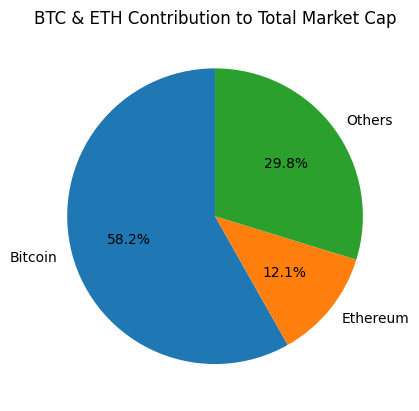

In [37]:
import matplotlib.pyplot as plt

shares = [btc_share, eth_share, 100 - (btc_share + eth_share)]
labels = ["Bitcoin", "Ethereum", "Others"]

plt.pie(shares, labels=labels, autopct="%.1f%%", startangle=90)
plt.title("BTC & ETH Contribution to Total Market Cap")
plt.show()


# Univariate Analysis

<Axes: xlabel='Price', ylabel='Count'>

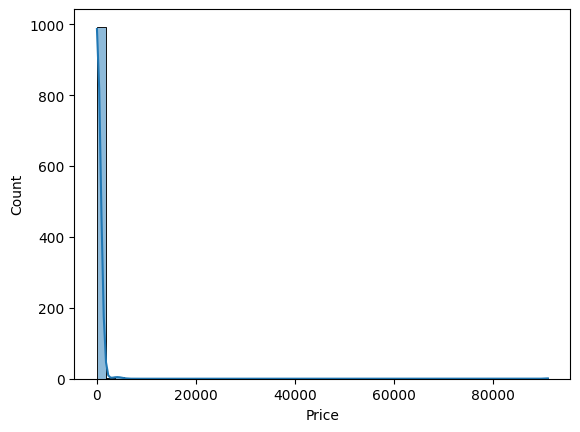

In [38]:
sns.histplot(df["Price"], bins=50, kde=True)


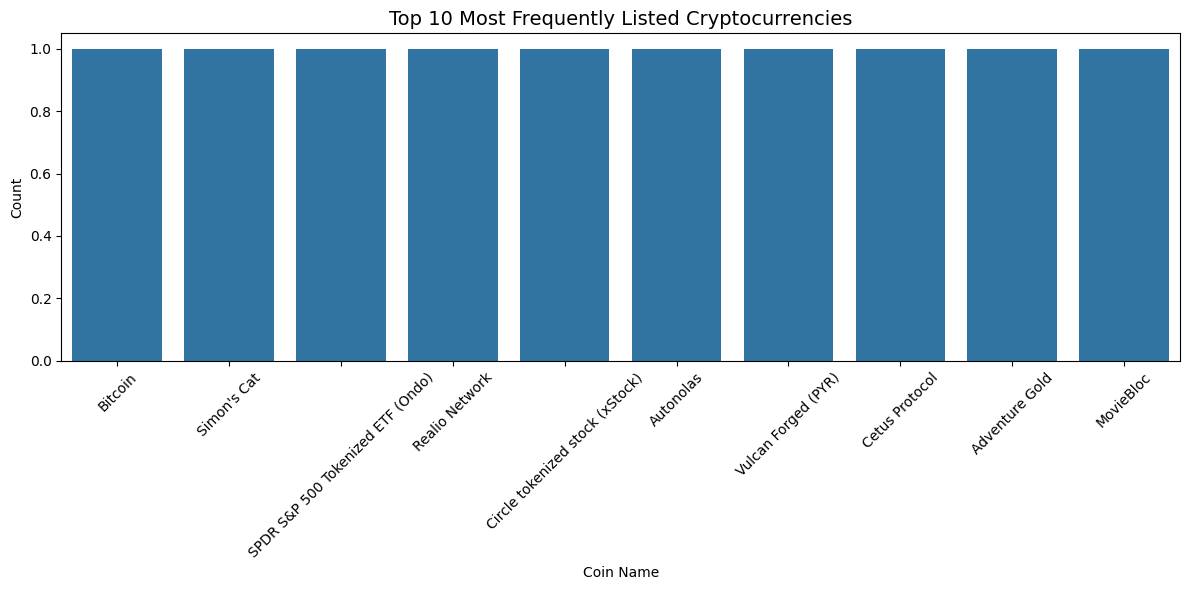

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Name", data=df, order=df["Name"].value_counts().index[:10])
plt.xticks(rotation=45)
plt.title("Top 10 Most Frequently Listed Cryptocurrencies", fontsize=14)
plt.xlabel("Coin Name")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Boxplot (detect outliers in MarketCap)

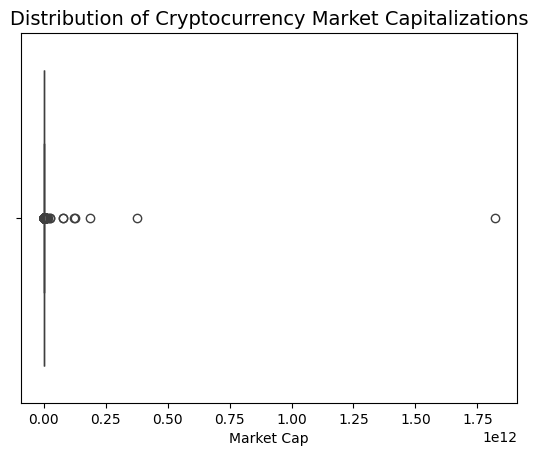

In [40]:
sns.boxplot(x=df["Market Cap"])
plt.title("Distribution of Cryptocurrency Market Capitalizations", fontsize=14)
plt.show()


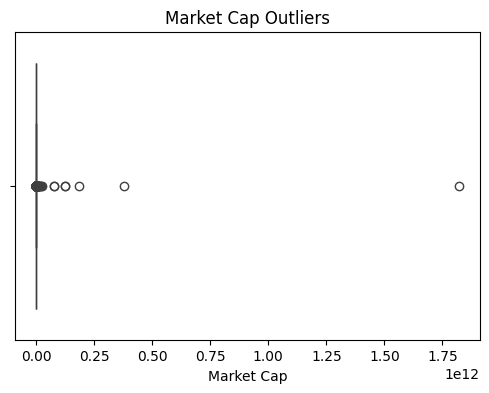

In [41]:
# Univariate - Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Market Cap"])
plt.title("Market Cap Outliers")
plt.show()

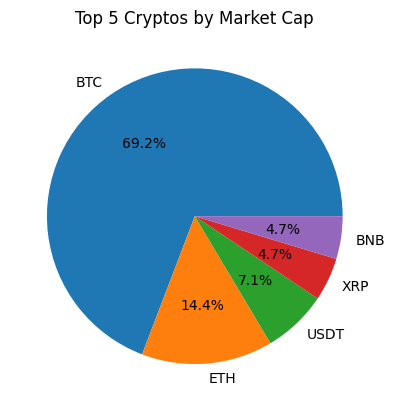

In [42]:
# Univariate - Pie chart for top 5 Market Cap share
top5 = df.nlargest(5, "Market Cap")
plt.pie(top5["Market Cap"], labels=top5["Symbol"], autopct="%1.1f%%")
plt.title("Top 5 Cryptos by Market Cap")
plt.show()

# 2. Bivariate Plots (two variables together)

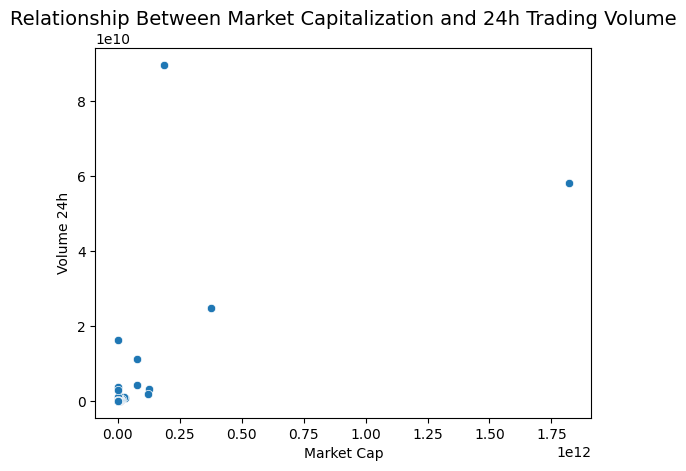

In [43]:
sns.scatterplot(x="Market Cap", y="Volume 24h", data=df)
plt.title("Relationship Between Market Capitalization and 24h Trading Volume", fontsize=14)
plt.show()


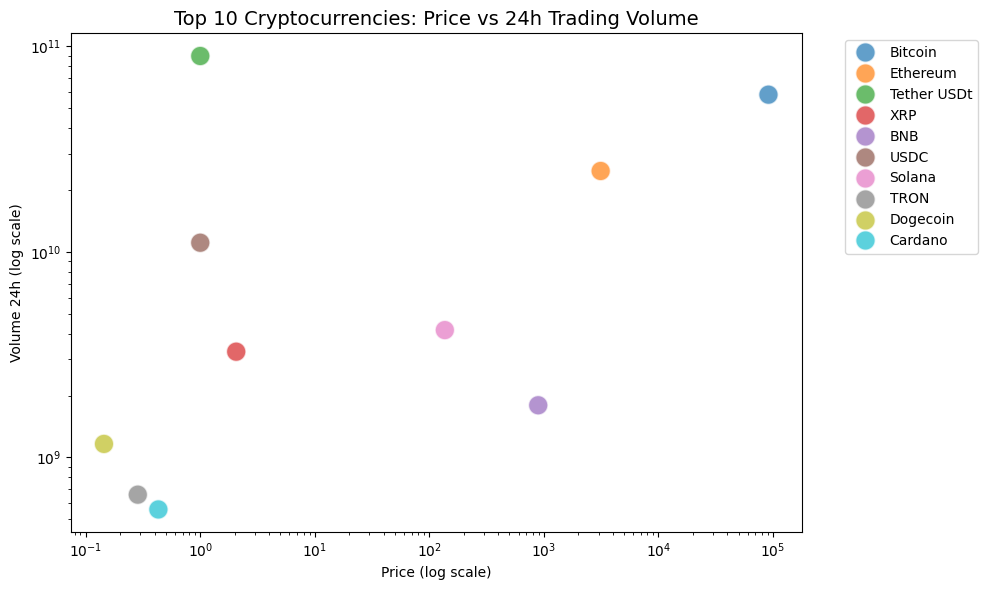

In [44]:
top10 = df.nlargest(10, "Market Cap")

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="Price",
    y="Volume 24h",
    hue="Name",
    data=top10,
    s=200,
    alpha=0.7
)

plt.xscale("log")
plt.yscale("log")
plt.title("Top 10 Cryptocurrencies: Price vs 24h Trading Volume", fontsize=14)
plt.xlabel("Price (log scale)")
plt.ylabel("Volume 24h (log scale)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


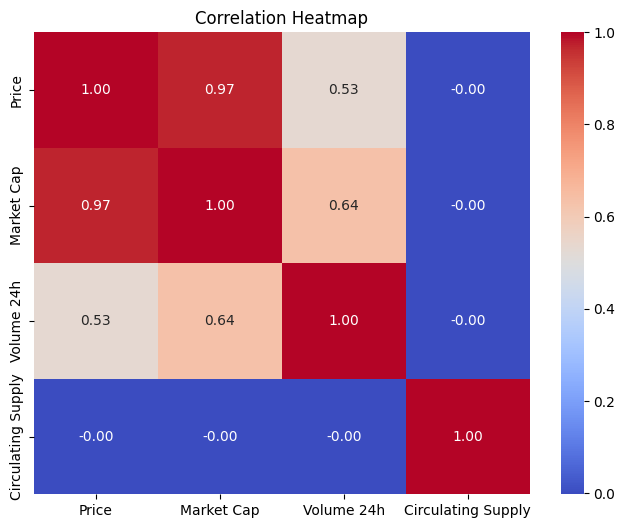

In [45]:
# Bivariate - Heatmap (Correlation matrix)
plt.figure(figsize=(8,6))
sns.heatmap(df[["Price", "Market Cap", "Volume 24h", "Circulating Supply"]].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

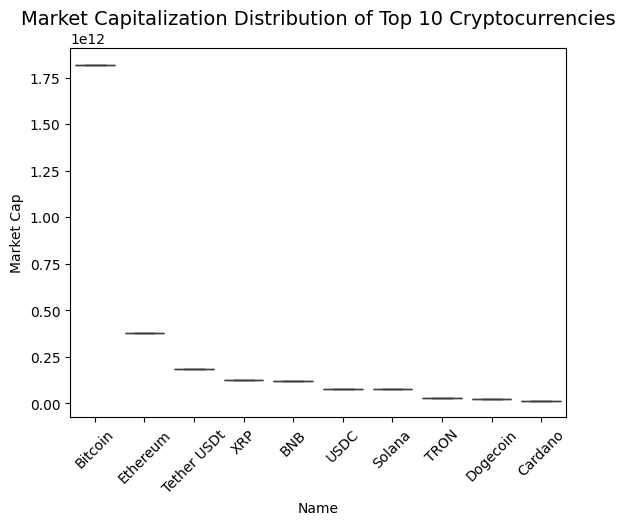

In [46]:
top10 = df.nlargest(10, "Market Cap")

sns.boxplot(x="Name", y="Market Cap", data=top10)
plt.xticks(rotation=45)
plt.title("Market Capitalization Distribution of Top 10 Cryptocurrencies", fontsize=14)
plt.show()


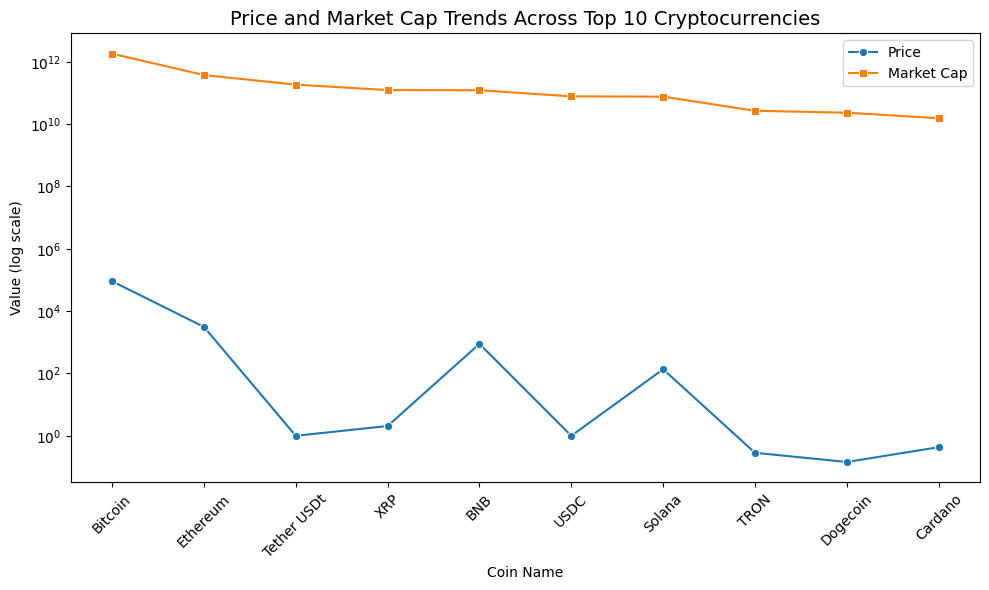

In [47]:
top10 = df.nlargest(10, "Market Cap").sort_values("Market Cap", ascending=False)

plt.figure(figsize=(10, 6))
sns.lineplot(x="Name", y="Price", data=top10, marker="o", label="Price")
sns.lineplot(x="Name", y="Market Cap", data=top10, marker="s", label="Market Cap")

plt.xticks(rotation=45)
plt.yscale("log")
plt.title("Price and Market Cap Trends Across Top 10 Cryptocurrencies", fontsize=14)
plt.xlabel("Coin Name")
plt.ylabel("Value (log scale)")
plt.legend()
plt.tight_layout()
plt.show()


# Multivariate Analysis

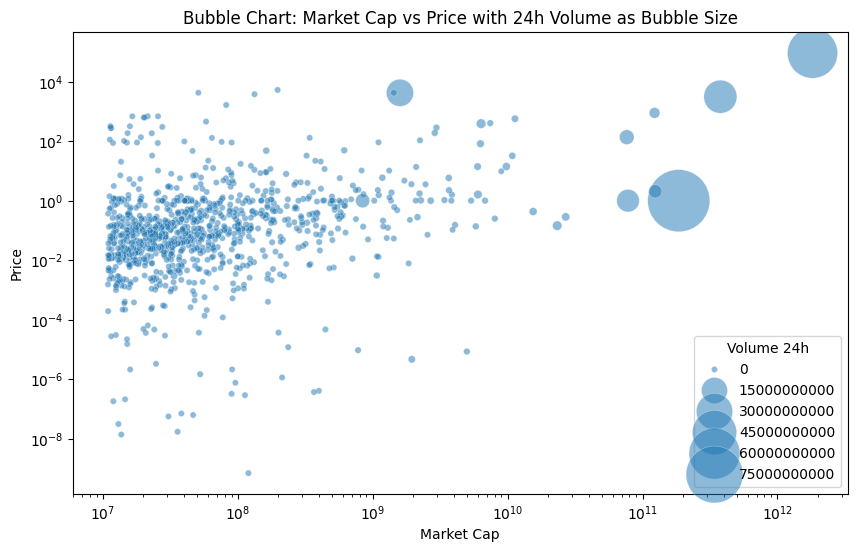

In [48]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Market Cap", y="Price", 
                size="Volume 24h", sizes=(20, 2000), 
                alpha=0.5, data=df)

plt.xscale("log")
plt.yscale("log")
plt.title("Bubble Chart: Market Cap vs Price with 24h Volume as Bubble Size")
plt.show()


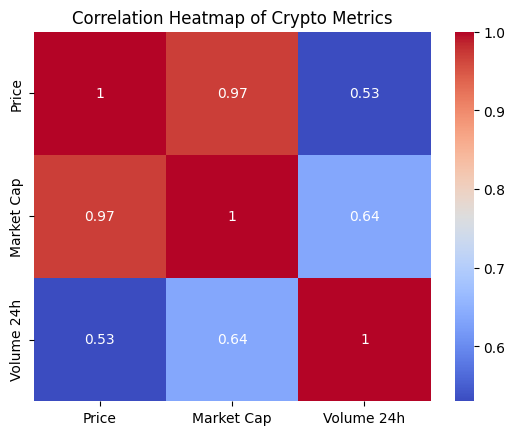

In [49]:
sns.heatmap(df[["Price", "Market Cap", "Volume 24h"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Crypto Metrics")
plt.show()

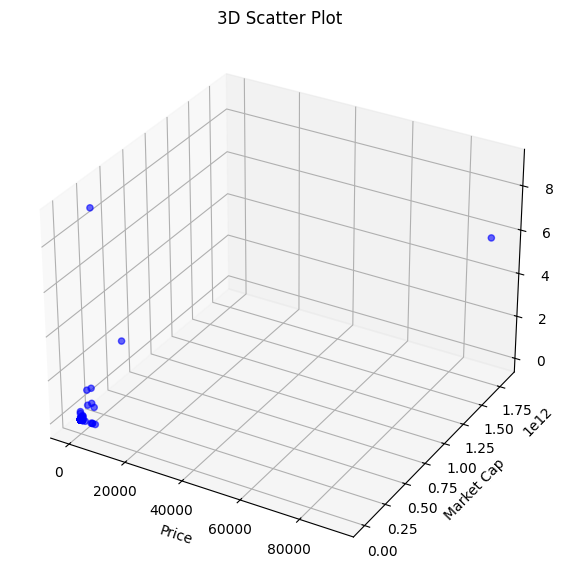

In [50]:
# Multivariate - 3D Scatter Plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(df["Price"], df["Market Cap"], df["Volume 24h"], c="blue", alpha=0.6)
ax.set_xlabel("Price")
ax.set_ylabel("Market Cap")
ax.set_zlabel("Volume 24h")
plt.title("3D Scatter Plot")
plt.show()

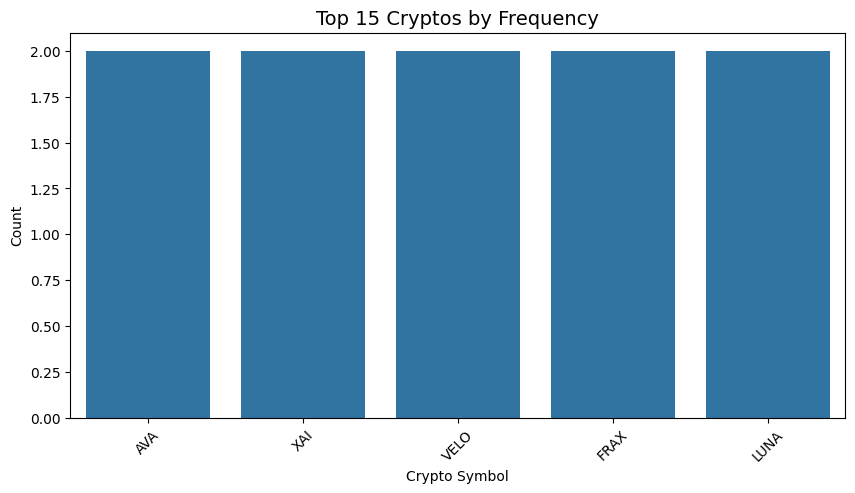

In [51]:
# 3. Bar Chart (for categorical data)
# ================================
plt.figure(figsize=(10,5))
sns.countplot(x='Symbol', data=df, order=df['Symbol'].value_counts().index[:5])
plt.title("Top 15 Cryptos by Frequency", fontsize=14)
plt.xlabel("Crypto Symbol")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

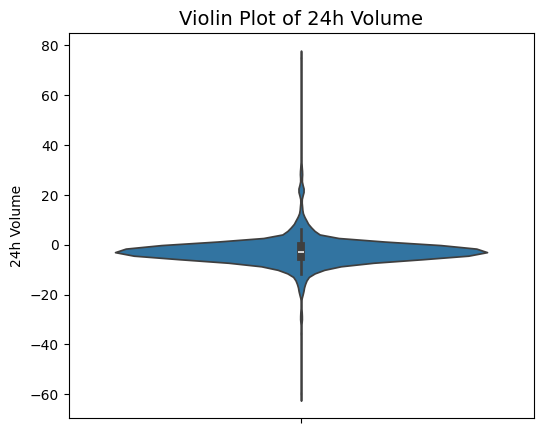

In [52]:
# 4. Violin Plot (numerical dist.)
# ================================
plt.figure(figsize=(6,5))
sns.violinplot(y=df['24h Change (%)'])
plt.title("Violin Plot of 24h Volume", fontsize=14)
plt.ylabel("24h Volume")
plt.show()

For Investors / Traders:

Focus on High-Volume Assets: Stick to BTC, ETH, USDT, and top stablecoins for safer and more liquid trades.

Be Cautious with Low-Volume Coins: They may look attractive but often come with high price manipulation risk.

Diversify, but Smartly: Consider market cap & liquidity filters when selecting coins, not just price.

For Analysts / Researchers:

Use Log Transformation: Apply log(Volume 24h) in plots to reduce skewness and reveal mid-volume patterns.

Segment Analysis: Compare Top 10 vs. Rest to highlight liquidity concentration.

Pareto Analysis: Identify the % of coins contributing to 80–90% of total trading volume (likely <10% of all coins).

For Exchanges / Platforms:

Promote Liquidity in Mid-Tier Coins: Encourage trading incentives for mid-volume assets to balance liquidity.

Risk Monitoring: Closely track low-volume coins to detect suspicious trading spikes.